# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# empty lists to hold data
city_name = []
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind = []
country = []
date = []

# variables for counting cities
count = 0
total = 1
setno = 1
print(f'Beginning Data Retrieval\n-----------------------------')
for city in cities:
    # url for api call
    response = requests.get(query_url + city).json()
    # look for data and add to lists
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        # printing the city number
        print(f"Processing Record {count} of Set {setno} | {total} | {city}")
        # increment counters
        count += 1
        total += 1
        # reset count and increment set number when it is 50
        if count % 50 == 0:
            setno += 1
            count = 0
    # exceptions
    except:
        # null values
        print("City not found. Skipping...")
print(f'-----------------------------\nTotal Records Processed: {total}\n-----------------------------\n')
print(f'-----------------------------\nData Retrieval Complete\n-----------------------------\n')


Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | 1 | flinders
Processing Record 1 of Set 1 | 2 | mataura
Processing Record 2 of Set 1 | 3 | montepuez
Processing Record 3 of Set 1 | 4 | busselton
Processing Record 4 of Set 1 | 5 | thompson
Processing Record 5 of Set 1 | 6 | vaini
Processing Record 6 of Set 1 | 7 | annau
City not found. Skipping...
Processing Record 7 of Set 1 | 8 | quatre cocos
Processing Record 8 of Set 1 | 9 | saint george
Processing Record 9 of Set 1 | 10 | constitucion
Processing Record 10 of Set 1 | 11 | fort-shevchenko
Processing Record 11 of Set 1 | 12 | rikitea
Processing Record 12 of Set 1 | 13 | margate
Processing Record 13 of Set 1 | 14 | port hardy
Processing Record 14 of Set 1 | 15 | bachaquero
Processing Record 15 of Set 1 | 16 | longyearbyen
Processing Record 16 of Set 1 | 17 | tamandare
Processing Record 17 of Set 1 | 18 | lebu
Processing Record 18 of Set 1 | 19 | mahebourg
Processing Record 19 of Set 1 | 20 | tandil


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create dataframe
cities_dict = {
            'City': city_name,
            'Lat': lat,
            'Lng': lng,
            'Max Temp': temp_max,
            'Humidity': humidity,
            'Cloudiness': clouds,
            'Wind Speed': wind,
            'Country': country,
            'Date': date,
}
show_dict = pd.DataFrame(cities_dict)
show_dict.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Flinders,-34.5833,150.8552,69.80,85,48,1.99,AU,1641234586
1,Mataura,-46.1927,168.8643,59.49,75,100,1.01,NZ,1641234587
2,Montepuez,-13.1256,38.9997,72.34,93,100,4.70,MZ,1641234587
3,Busselton,-33.6500,115.3333,62.04,83,2,14.16,AU,1641234587
4,Thompson,55.7435,-97.8558,-21.84,76,40,10.36,CA,1641234393
5,Vaini,-21.2000,-175.2000,78.96,94,90,20.71,TO,1641234588
6,Annau,37.8876,58.5160,38.70,93,90,13.80,TM,1641234588
7,Quatre Cocos,-20.2078,57.7625,78.91,77,76,7.96,MU,1641234589
8,Saint George,37.1041,-113.5841,46.35,45,1,1.99,US,1641234589
9,Constitución,-35.3333,-72.4167,69.39,70,15,12.88,CL,1641234339


In [5]:
# pull the needed columns
cs = show_dict[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Date']]
# set quartiles
quartiles = cs.quantile([0.25, 0.5,0.75])
# get stats
cities_stats = cs.aggregate(['count','mean','std', 'min','max'])
# add quartile data to dataframe
cities_stats = cities_stats.append(quartiles)
# set the order of the index
cities_stats.index = ['count', 'mean', 'std', 'min', '0.25', '0.5', '0.75', 'max']
# rename quartile rows to %
cities_stats = cities_stats.rename(index={'0.25': '25%', '0.5': '50%', '0.75': '75%'})
cities_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,20.06613,17.930422,49.744095,73.049209,60.692443,8.340896,1.641235e+09
std,33.07715,89.635442,33.752999,19.658556,39.811731,6.354530,8.760444e+01
min,-54.80000,-175.200000,-55.800000,13.000000,0.000000,0.000000,1.641234e+09
25%,78.21860,179.316700,99.790000,100.000000,100.000000,43.730000,1.641235e+09
50%,-6.83670,-63.057800,28.180000,64.000000,20.000000,3.440000,1.641235e+09
75%,24.48330,23.783300,59.810000,76.000000,75.000000,6.910000,1.641235e+09
max,48.04480,95.321400,77.160000,88.000000,100.000000,11.500000,1.641235e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# dataframe that has cities over 100% humidity
over_hun = show_dict[show_dict['Humidity'] > 100]
# print how many cities are over 100%
print(f'Amount of cities with humidity over 100%: {len(over_hun)}')
# drop the values from the dataframe
show_dict = show_dict.drop(over_hun.index,inplace=False)
show_dict

Amount of cities with humidity over 100%: 0


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Flinders,-34.5833,150.8552,69.80,85,48,1.99,AU,1641234586
1,Mataura,-46.1927,168.8643,59.49,75,100,1.01,NZ,1641234587
2,Montepuez,-13.1256,38.9997,72.34,93,100,4.70,MZ,1641234587
3,Busselton,-33.6500,115.3333,62.04,83,2,14.16,AU,1641234587
4,Thompson,55.7435,-97.8558,-21.84,76,40,10.36,CA,1641234393
...,...,...,...,...,...,...,...,...,...
564,Santa Isabel Rio Negro,-0.4139,-65.0192,91.74,45,98,2.66,BR,1641234792
565,İzmit,40.7669,29.9169,56.41,59,0,5.75,TR,1641234792
566,Asopós,36.7333,22.8667,54.86,83,0,7.36,GR,1641234793
567,Bayan,46.0833,127.4000,-16.01,99,23,4.00,CN,1641234793


In [7]:
# set quartiles for humidity
qts = show_dict['Humidity'].quantile([0.25, 0.5,0.75])
# set lower quartile
lowerq = qts[0.25]
# set upper quartile
upperq = qts[0.75]
# calculate interquartile range
iqr = upperq-lowerq
# calculate the lower bound
lower_bound = lowerq - (1.5*iqr)
# calculate the upper bound
upper_bound = upperq + (1.5*iqr)

# dataframe for outliers
outliers = show_dict[(show_dict['Humidity'] < lower_bound) | (show_dict['Humidity'] > upper_bound)]
# variable to hold the index values of the outliers
outliers_list = outliers.index
# dataframe containing the outliers
outliers_df = show_dict.iloc[outliers_list]
outliers_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
19,Tandil,-37.3217,-59.1332,97.30,20,4,3.00,AR,1641234593
84,Adrar,20.5022,-10.0711,68.59,19,28,10.29,MR,1641234618
93,Tambura,5.6000,27.4667,78.94,27,99,6.06,SS,1641234622
94,Yulara,-25.2406,130.9889,89.44,23,14,17.27,AU,1641234622
118,Mamou,10.5000,-12.0000,75.54,24,100,3.96,GN,1641234631
150,Tessalit,20.1986,1.0114,66.31,22,0,8.61,ML,1641234643
202,Mercedes,-34.6515,-59.4307,99.79,17,6,6.91,AR,1641234661
223,San Patricio,28.0170,-97.5169,53.69,24,0,3.06,US,1641234669
227,Boyuibe,-20.4167,-63.2833,98.51,23,0,9.46,BO,1641234670
240,Atar,20.5169,-13.0499,72.03,17,7,10.09,MR,1641234675


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# drop the outliers from the dataframe
clean_city_data = show_dict.drop(outliers_df.index,inplace=False)

# # export output to csv file
# #
clean_city_data.to_csv(output_data_file, index=False, encoding="utf-8")
clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Flinders,-34.5833,150.8552,69.80,85,48,1.99,AU,1641234586
1,Mataura,-46.1927,168.8643,59.49,75,100,1.01,NZ,1641234587
2,Montepuez,-13.1256,38.9997,72.34,93,100,4.70,MZ,1641234587
3,Busselton,-33.6500,115.3333,62.04,83,2,14.16,AU,1641234587
4,Thompson,55.7435,-97.8558,-21.84,76,40,10.36,CA,1641234393
...,...,...,...,...,...,...,...,...,...
563,Tazovsky,67.4667,78.7000,-14.13,97,100,14.83,RU,1641234792
564,Santa Isabel Rio Negro,-0.4139,-65.0192,91.74,45,98,2.66,BR,1641234792
565,İzmit,40.7669,29.9169,56.41,59,0,5.75,TR,1641234792
566,Asopós,36.7333,22.8667,54.86,83,0,7.36,GR,1641234793


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

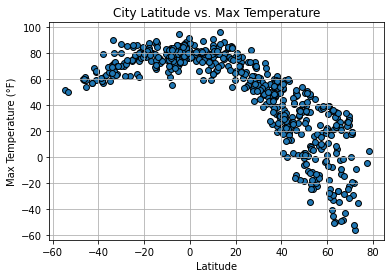

In [9]:
# config scatter plot
clean_city_data.plot(kind='scatter', x='Lat', y='Max Temp',grid=True, title="City Latitude vs. Max Temperature",edgecolors='black', s=35)
# x & y labels of plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
# save png of plot
plt.savefig("../output_data/City Latitude vs. Max Temperature.png")
plt.show()

#### Plot shows that cities near equator have a higher temperature.

## Latitude vs. Humidity Plot

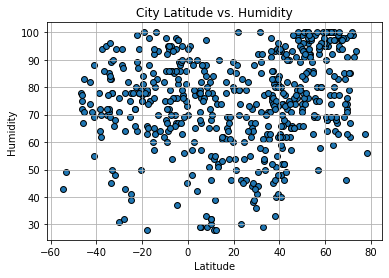

In [10]:
# config scatter plot
clean_city_data.plot(kind='scatter', x='Lat', y='Humidity',grid=True, title="City Latitude vs. Humidity",edgecolors='black',s=35)
# x & y labels of plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# save png of plot
plt.savefig("../output_data/City Latitude vs. Humidity.png")
plt.show()

#### Plot does have have aclear correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

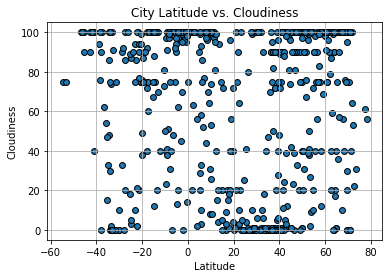

In [11]:
# config scatter plot
clean_city_data.plot(kind='scatter', x='Lat', y='Cloudiness',grid=True, title="City Latitude vs. Cloudiness",edgecolors='black',s=35)
# x & y labels of plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# save png of plot
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")
plt.show()

#### No clear correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

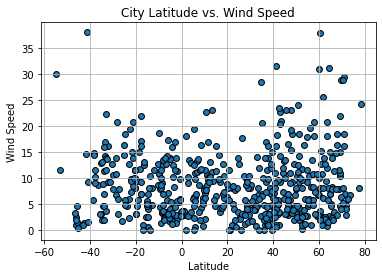

In [12]:
# config scatter plot
clean_city_data.plot(kind='scatter', x='Lat', y='Wind Speed',grid=True, title="City Latitude vs. Wind Speed",edgecolors='black',s=35)
# x & y labels of plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# save png of plot
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")
plt.show()

#### No clear correlation between latitude and wind speed.

## Linear Regression

In [13]:
# create variables to put the cities in northern/southern hemispheres
nh = clean_city_data[clean_city_data['Lat'] >= 0]
sh = clean_city_data[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8311528662107368


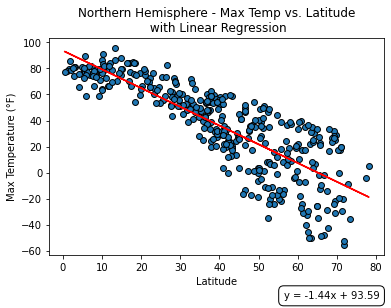

In [14]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Max Temp']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png",bbox_inches='tight',dpi=100)
plt.show()


#### Temperature increases closer to the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6491722639884758


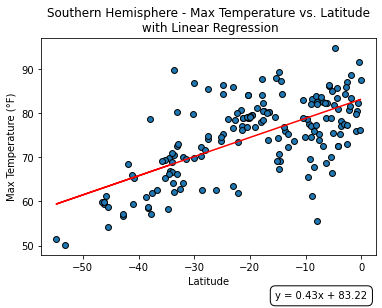

In [15]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Max Temp']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Southern Hemisphere - Max Temperature vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Southern Hemisphere - Max Temperature vs. Latitude Linear Regression.png",bbox_inches='tight',dpi=100)
plt.show()

#### Temperature increases closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.41443785275389144


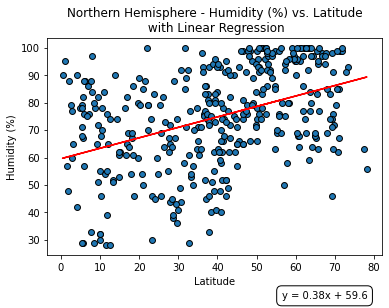

In [16]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Humidity']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png",bbox_inches='tight',dpi=100)
plt.show()

#### No clear relationship between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17824723707219195


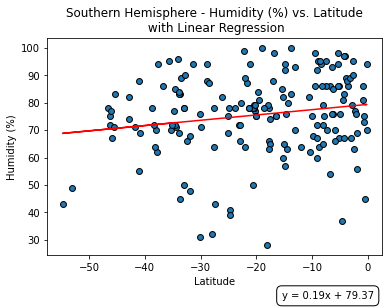

In [17]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Humidity']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png",bbox_inches='tight',dpi=100)
plt.show()

#### No clear relationship between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14494636862146384


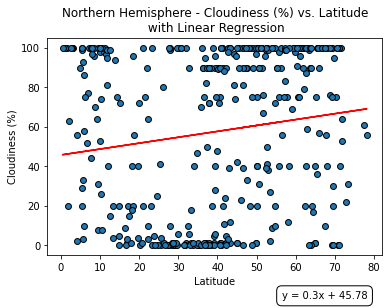

In [18]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Cloudiness']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

#### No clear relationship between latitude and cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15566559977733835


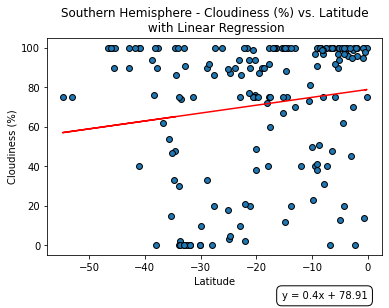

In [19]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Cloudiness']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

#### No clear relationship between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12447486409519007


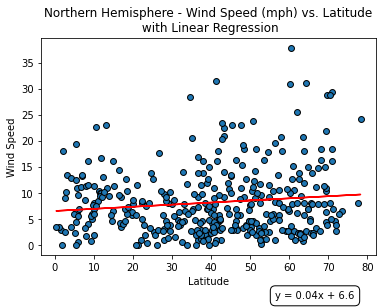

In [20]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Wind Speed']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

#### There is a slight decrease on wind speed closer to the equator, but there is no clear relationship between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.16535483872354348


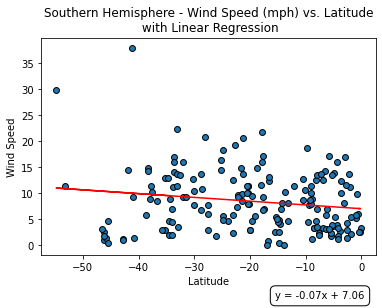

In [21]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Wind Speed']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

#### There is a slight decrease on wind speed closer to the equator, but there is no clear relationship between latitude and wind speed.